<a href="https://colab.research.google.com/github/neehasajja/waymo-opendataset/blob/main/training/lidar_calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install waymo-open-dataset-tf-2-6-0

In [3]:
import os
import pyarrow.parquet as pq

# Set the path to the metadata file
metadata_file_path = '/content/drive/MyDrive/training/lidar_calibration/_metadata'

# Read the metadata file
metadata_file = pq.ParquetFile(metadata_file_path)

# Get the metadata
file_metadata = metadata_file.metadata
schema_metadata = file_metadata.metadata

# Print the metadata
print("File metadata:", file_metadata)
print("Schema metadata:", schema_metadata)

File metadata: <pyarrow._parquet.FileMetaData object at 0x7f29bc07de00>
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 6
  num_rows: 3990
  num_row_groups: 798
  format_version: 2.6
  serialized_size: 896954
Schema metadata: {b'ARROW:schema': b'/////6ACAAAQAAAAAAAKAAwABgAFAAgACgAAAAABBAAMAAAACAAIAAAABAAIAAAABAAAAAYAAAAsAgAA2AEAAEQBAADoAAAAjAAAAAQAAAD8/f//AAABDBQAAABIAAAABAAAAAEAAABAAAAAMwAAAFtMaURBUkNhbGlicmF0aW9uQ29tcG9uZW50XS5iZWFtX2luY2xpbmF0aW9uLnZhbHVlcwAI/v//VP7//wAAAQMQAAAAGAAAAAQAAAAAAAAABAAAAGl0ZW0AAAAAxv7//wAAAgCA/v//AAABAxAAAABEAAAABAAAAAAAAAAwAAAAW0xpREFSQ2FsaWJyYXRpb25Db21wb25lbnRdLmJlYW1faW5jbGluYXRpb24ubWF4AAAAAB7///8AAAIA2P7//wAAAQMQAAAARAAAAAQAAAAAAAAAMAAAAFtMaURBUkNhbGlicmF0aW9uQ29tcG9uZW50XS5iZWFtX2luY2xpbmF0aW9uLm1pbgAAAAB2////AAACADD///8AAAEQFAAAAEwAAAAEAAAAAQAAAEgAAAAvAAAAW0xpREFSQ2FsaWJyYXRpb25Db21wb25lbnRdLmV4dHJpbnNpYy50cmFuc2Zvcm0AAAAGAAgABAAGAAAAEAAAAJD///8AAAEDEAAAABwAAAAEAAAAAAAAAAQAAABpdGVtAAAGAAgABgAGAAAAAAACAMD///8AAAECEAAAACgAAAAEAAAAAAAA

In [4]:
import os
import pyarrow.parquet as pq
import tensorflow as tf

# Set the path to the directory containing the parquet files
dir_path = '/content/drive/MyDrive/training/lidar_calibration/'
# Get a list of all the files in the directory
files = os.listdir(dir_path)

# Loop through each file and extract metadata
for filename in files:
    # Skip directories
    if os.path.isdir(os.path.join(dir_path, filename)):
        continue
        
    # Check if the file is a parquet file
    if filename.endswith('.parquet'):
        # Read the parquet file
        parquet_file = pq.ParquetFile(os.path.join(dir_path, filename))

        # Get the metadata
        metadata = parquet_file.metadata

        # Print the metadata
        print("File:", filename)
        print(metadata)

Streaming output truncated to the last 5000 lines.
File: 12365808668068790137_2920_000_2940_000.parquet
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 6
  num_rows: 5
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 2192
File: 13517115297021862252_2680_000_2700_000.parquet
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 6
  num_rows: 5
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 2192
File: 13506499849906169066_120_000_140_000.parquet
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 6
  num_rows: 5
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 2188
File: 13254498462985394788_980_000_1000_000.parquet
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 6
  num_rows: 5
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 2190
File: 13823509240483976870_1514_190_1534_190.parquet
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 6
  num_rows: 5
  num_row_groups: 1
  format_vers

In [5]:
import os
import pyarrow.parquet as pq
import pandas as pd

# Set the path to the directory containing the parquet files
dir_path = '/content/drive/MyDrive/training/lidar_calibration/'

# Get a list of all the files in the directory
files = os.listdir(dir_path)

# Loop through each file and extract metadata
for filename in files:
    # Skip directories
    if os.path.isdir(os.path.join(dir_path, filename)):
        continue
        
    # Check if the file is a parquet file
    if filename.endswith('.parquet'):
        # Read the parquet file
        parquet_file = pq.ParquetFile(os.path.join(dir_path, filename))

        # Get the table from the file
        table = parquet_file.read()

        # Convert the table to a Pandas DataFrame
        df = table.to_pandas()

        # Calculate column statistics
        statistics = df.describe()

        # Print the statistics
        print("File:", filename)
        print(statistics)

Streaming output truncated to the last 5000 lines.
File: 5446766520699850364_157_000_177_000.parquet
       key.laser_name  [LiDARCalibrationComponent].beam_inclination.min  \
count        5.000000                                          5.000000   
mean         3.000000                                         -1.319921   
std          1.581139                                          0.560974   
min          1.000000                                         -1.570796   
25%          2.000000                                         -1.570796   
50%          3.000000                                         -1.570796   
75%          4.000000                                         -1.570796   
max          5.000000                                         -0.316420   

       [LiDARCalibrationComponent].beam_inclination.max  
count                                          5.000000  
mean                                           0.426388  
std                                            0.

In [6]:
import pyarrow.parquet as pq
import pandas as pd

# Set the path to the Parquet file
parquet_file_path = '/content/drive/MyDrive/training/lidar_calibration/file1.parquet'

# Read the Parquet file into a Pyarrow table
table = pq.read_table(parquet_file_path)

# Convert the table to a Pandas DataFrame
df = table.to_pandas()

# Print the first 10 rows of the DataFrame
print(df.head(10))

              key.segment_context_name  key.laser_name  \
0  16102220208346880_1420_000_1440_000               2   
1  16102220208346880_1420_000_1440_000               5   
2  16102220208346880_1420_000_1440_000               3   
3  16102220208346880_1420_000_1440_000               4   
4  16102220208346880_1420_000_1440_000               1   

     [LiDARCalibrationComponent].extrinsic.transform  \
0  [0.9997523663719984, 0.004852299647279404, 0.0...   
1  [-0.9992289517496568, -0.028692999031940995, -...   
2  [0.021488981694881004, -0.9997519542327193, 0....   
3  [-0.03861769555452071, 0.9992465657605545, -0....   
4  [-0.8474174306637593, -0.5309062391880738, 0.0...   

   [LiDARCalibrationComponent].beam_inclination.min  \
0                                         -1.570796   
1                                         -1.570796   
2                                         -1.570796   
3                                         -1.570796   
4                                      

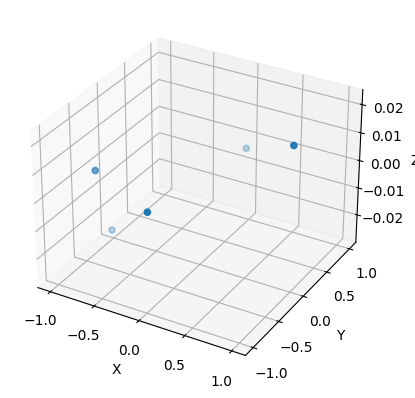

In [7]:
import matplotlib.pyplot as plt

# Extract the x, y, and z coordinates from the transform column of the DataFrame
x_coords = [row[0] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]
y_coords = [row[1] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]
z_coords = [row[2] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]

# Plot the x, y, and z coordinates
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()